# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 7.5 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
numba 0.56.2 requires setuptools<60, but you have setuptools 65.4.1 which is incompatible.
Looking in indexes: https:/

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "davidrowley"
kaggle_key = "33abdab7d43d8e19b2619c98f0147d8c"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 59.4MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [155]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train["datetime"] = pd.to_datetime(train.loc[:, "datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [156]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [27]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test["datetime"] = pd.to_datetime(test.loc[:, "datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [11]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [12]:
predictor = TabularPredictor(label="count", eval_metric="r2", learner_kwargs={"ignored_columns":["casual", "registered"]}).fit(train_data=train, time_limit=600, presets="best_quality")

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20221007_165211/"
INFO:autogluon.tabular.predictor.predictor:Presets specified: ['best_quality']
INFO:autogluon.tabular.predictor.predictor:Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ... Time limit = 600s
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "AutogluonModels/ag-20221007_165211/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.14
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    10886
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 11
INFO:autogluon.tabular.learner.default_learner:Label Column: count
INFO:autogluon.tabular.

### Review AutoGluon's training run with ranking of models that did the best.

In [13]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.914456      16.373355  567.258066                0.000940           0.257589            3       True         14
1   RandomForestMSE_BAG_L2   0.913587      12.556893  422.755946                0.742573          31.818880            2       True         12
2          LightGBM_BAG_L2   0.907658      12.086096  416.147542                0.271776          25.210475            2       True         11
3          CatBoost_BAG_L2   0.905312      11.922975  446.643991                0.108655          55.706925            2       True         13
4        LightGBMXT_BAG_L2   0.888642      15.249411  454.264198                3.435091          63.327131            2       True         10
5    KNeighborsDist_BAG_L1   0.784305       0.105205    0.036075                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6857197008702899,
  'KNeighborsDist_BAG_L1': 0.7843047406609882,
  'LightGBMXT_BAG_L1': 0.4732562269834053,
  'LightGBM_BAG_L1': 0.476531925532341,
  'RandomForestMSE_BAG_L1': 0.5860271

### Create predictions from test dataset

In [15]:
predictions = predictor.predict(test)
predictions.head()

0    23.363235
1    42.568157
2    45.727264
3    49.535522
4    51.837555
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [16]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.797356
std        89.967384
min         3.035982
25%        20.541925
50%        64.107773
75%       168.193680
max       365.466217
Name: count, dtype: float64

In [17]:
# How many negative values do we have?
sum(n<0 for n in predictions)

0

In [ ]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [18]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

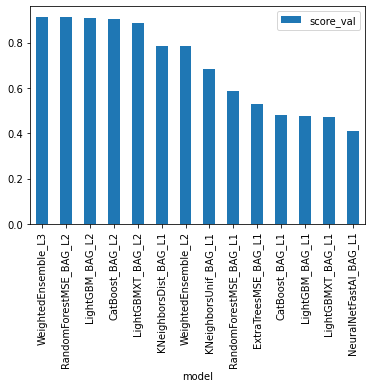

In [150]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

# Initial score of `1.79080`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0396d88ed0>,
      dtype=object)

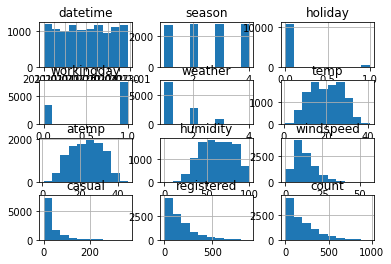

In [19]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   category      
 2   holiday     6493 non-null   int32         
 3   workingday  6493 non-null   int32         
 4   weather     6493 non-null   category      
 5   temp        6493 non-null   float32       
 6   atemp       6493 non-null   float32       
 7   humidity    6493 non-null   int32         
 8   windspeed   6493 non-null   float32       
 9   year        6493 non-null   int32         
 10  month       6493 non-null   int32         
 11  day         6493 non-null   int32         
 12  hour        6493 non-null   int32         
dtypes: category(2), datetime64[ns](1), float32(3), int32(7)
memory usage: 317.6 KB


In [157]:
# create a new feature
train["year"], train["month"], train["day"], train["hour"] = train.datetime.dt.year, train.datetime.dt.month, train.datetime.dt.day, train.datetime.dt.hour
test["year"], test["month"], test["day"], test["hour"] = test.datetime.dt.year, test.datetime.dt.month, test.datetime.dt.day, test.datetime.dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [158]:
train["season"] = train.loc[:, "season"].astype("category")
train["weather"] = train.loc[:, "weather"].astype("category")
test["season"] = test.loc[:, "season"].astype("category")
test["weather"] = test.loc[:, "weather"].astype("category")

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  int32         
 3   workingday  10886 non-null  int32         
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float32       
 6   atemp       10886 non-null  float32       
 7   humidity    10886 non-null  int32         
 8   windspeed   10886 non-null  float32       
 9   casual      10886 non-null  int32         
 10  registered  10886 non-null  int32         
 11  count       10886 non-null  int32         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
dtypes: category(2), dateti

In [69]:
train32, test32 = train, test

In [70]:
for i, typ in enumerate(train32.dtypes):
  name = train32.columns[i]
  if typ == 'int64':
    train32[name] = train32.loc[:, name].astype('int32')
  if typ == 'float64':
    train32[name] = train32.loc[:, name].astype('float32')

for i, typ in enumerate(test32.dtypes):
  name = test32.columns[i]
  if typ == 'int64':
    test32[name] = test32.loc[:, name].astype('int32')
  if typ == 'float64':
    test32[name] = test32.loc[:, name].astype('float32')

In [77]:
train32.info(), test32.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  int32         
 3   workingday  10886 non-null  int32         
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float32       
 6   atemp       10886 non-null  float32       
 7   humidity    10886 non-null  int32         
 8   windspeed   10886 non-null  float32       
 9   casual      10886 non-null  int32         
 10  registered  10886 non-null  int32         
 11  count       10886 non-null  int32         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
dtypes: category(2), dateti

(None, None)

In [78]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0396bc71d0>,
      dtype=object)

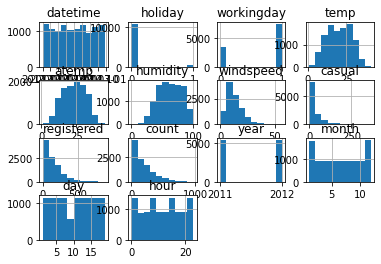

In [79]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with new 32 datatypes, with same features.

In [ ]:
predictor_new_features = TabularPredictor(label="count", eval_metric="r2", learner_kwargs={"ignored_columns":["casual", "registered", "year", "month", "day", "hour"]}).fit(
    train_data=train, time_limit=600, presets="best_quality")

In [151]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.915041      18.384490  536.742682                0.001326           0.251236            3       True         14
1   RandomForestMSE_BAG_L2   0.914051      13.511818  430.162789                0.781745          31.913608            2       True         12
2          LightGBM_BAG_L2   0.908526      13.105376  425.769629                0.375304          27.520448            2       True         11
3          CatBoost_BAG_L2   0.895743      12.875467  435.935211                0.145395          37.686030            2       True         13
4        LightGBMXT_BAG_L2   0.887487      17.226115  477.057390                4.496043          78.808209            2       True         10
5    KNeighborsDist_BAG_L1   0.784305       0.106507    0.034491                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6857197008702899,
  'KNeighborsDist_BAG_L1': 0.7843047406609882,
  'LightGBMXT_BAG_L1': 0.47562787163457043,
  'LightGBM_BAG_L1': 0.47953368221940273,
  'RandomForestMSE_BAG_L1': 0.5853

In [83]:
# Predict
predictions_32 = predictor_new_features.predict(test)

In [84]:
# Check negatives and set to zero
sum(n < 0 for n in predictions_32)

0

In [85]:
submission_32 = pd.read_csv("sampleSubmission.csv")
submission_32["count"] = predictions_32
submission_32.to_csv("submission_32.csv", index=False)

In [86]:
!kaggle competitions submit -c bike-sharing-demand -f submission_32.csv -m "from dtype 64s to 32s"

100% 188k/188k [00:02<00:00, 77.3kB/s]
Successfully submitted to Bike Sharing Demand

In [87]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName           date                 description            status    publicScore  privateScore  
-----------------  -------------------  ---------------------  --------  -----------  ------------  
submission_32.csv  2022-10-07 18:29:58  from dtype 64s to 32s  complete  1.79416      1.79416       
submission.csv     2022-10-06 22:11:03  first raw submission   complete  1.79080      1.79080       
submission.csv     2022-10-06 17:35:33  first raw submission   complete  1.78795      1.78795       


# New Score: `1.79416`

## Step 5.1: Rerun with additional features

In [ ]:
predictor_with_new_features = TabularPredictor(label="count", eval_metric="r2", learner_kwargs={"ignored_columns":["casual", "registered"]}).fit(train_data=train, time_limit=600, presets="best_quality")

In [153]:
predictor_with_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.971613      26.709559  559.346184                0.001264           0.393702            3       True         14
1          LightGBM_BAG_L2   0.970999      24.664813  441.422788                0.409381          31.360505            2       True         11
2        LightGBMXT_BAG_L2   0.970332      25.266444  450.671499                1.011011          40.609216            2       True         10
3          CatBoost_BAG_L2   0.969624      24.422503  441.958318                0.167070          31.896035            2       True         13
4   RandomForestMSE_BAG_L2   0.969236      25.120832  455.086727                0.865400          45.024444            2       True         12
5      WeightedEnsemble_L2   0.968456      22.628304  361.208966                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6857197008702899,
  'KNeighborsDist_BAG_L1': 0.7843047406609882,
  'LightGBMXT_BAG_L1': 0.9641120610158099,
  'LightGBM_BAG_L1': 0.9649317012151711,
  'RandomForestMSE_BAG_L1': 0.955252

In [91]:
predictions_with_new_features = predictor_with_new_features.predict(test)

In [92]:
submission_with_new_features = pd.read_csv("sampleSubmission.csv")
submission_with_new_features["count"] = predictions_with_new_features
submission_with_new_features.to_csv("submission_with_new_features.csv", index=False)

In [93]:
!kaggle competitions submit -c bike-sharing-demand -f submission_with_new_features.csv -m "added year, month, day, hour features"

100% 188k/188k [00:02<00:00, 77.5kB/s]
Successfully submitted to Bike Sharing Demand

In [94]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                          date                 description                            status    publicScore  privateScore  
--------------------------------  -------------------  -------------------------------------  --------  -----------  ------------  
submission_with_new_features.csv  2022-10-07 18:52:44  added year, month, day, hour features  complete  0.65076      0.65076       
submission_32.csv                 2022-10-07 18:29:58  from dtype 64s to 32s                  complete  1.79416      1.79416       
submission.csv                    2022-10-06 22:11:03  first raw submission                   complete  1.79080      1.79080       
submission.csv                    2022-10-06 17:35:33  first raw submission                   complete  1.78795      1.78795       


# New Score of `0.65076`

## Step 5.2 Normalise where possible

In [121]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.230862,23.655085,61.886460,12.799396,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613
std,0.166599,0.466159,7.791590,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,13.940000,16.665001,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000
50%,0.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000
75%,0.000000,1.000000,26.240000,31.059999,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000
max,1.000000,1.000000,41.000000,45.455002,100.000000,56.996899,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000


In [125]:
train_normalised = train
train_normalised["temp"] = (train["temp"]-train["temp"].min())/(train["temp"].max()-train["temp"].min())
train_normalised["atemp"] = (train["atemp"]-train["atemp"].min())/(train["atemp"].max()-train["atemp"].min())
train_normalised["humidity"] = (train["humidity"]-train["humidity"].min())/(train["humidity"].max()-train["humidity"].min())
train_normalised["windspeed"] = (train["windspeed"]-train["windspeed"].min())/(train["windspeed"].max()-train["windspeed"].min())

In [ ]:
train.describe()

In [127]:
predictor_with_new_features = TabularPredictor(label="count", eval_metric="r2", learner_kwargs={"ignored_columns":["casual", "registered"]}).fit(train_data=train, time_limit=600, presets="best_quality")

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20221007_194326/"
INFO:autogluon.tabular.predictor.predictor:Presets specified: ['best_quality']
INFO:autogluon.tabular.predictor.predictor:Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ... Time limit = 600s
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "AutogluonModels/ag-20221007_194326/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.14
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    10886
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 15
INFO:autogluon.tabular.learner.default_learner:Label Column: count
INFO:autogluon.tabular.

In [128]:
normalised_predictions = predictor_with_new_features.predict(test)

In [129]:
submission_nomalised = pd.read_csv("sampleSubmission.csv")
submission_nomalised["count"] = predictions_with_new_features
submission_nomalised.to_csv("submission_normalised.csv", index=False)

In [130]:
!kaggle competitions submit -c bike-sharing-demand -f submission_normalised.csv -m "normalised?"

100% 188k/188k [00:03<00:00, 60.6kB/s]
Successfully submitted to Bike Sharing Demand

In [131]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                          date                 description                            status    publicScore  privateScore  
--------------------------------  -------------------  -------------------------------------  --------  -----------  ------------  
submission_normalised.csv         2022-10-07 19:54:31  normalised?                            complete  0.65076      0.65076       
submission_with_new_features.csv  2022-10-07 18:52:44  added year, month, day, hour features  complete  0.65076      0.65076       
submission_32.csv                 2022-10-07 18:29:58  from dtype 64s to 32s                  complete  1.79416      1.79416       
submission.csv                    2022-10-06 22:11:03  first raw submission                   complete  1.79080      1.79080       


## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [159]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613
std,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838
min,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000
50%,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000
75%,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000
max,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000


In [173]:
predictor_new_hpo = TabularPredictor(label="count", problem_type="regression", eval_metric="r2", learner_kwargs={"ignored_columns":["casual", "registered"]}, verbosity=0).fit(
    train_data=train, time_limit=300, presets="best_quality")

In [174]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3   0.971624      20.361582  275.455827                0.000768           0.201342            3       True         10
1         LightGBM_BAG_L2   0.971292      18.655703  211.852039                0.431063          31.968300            2       True          8
2       LightGBMXT_BAG_L2   0.969879      19.230081  213.564296                1.005441          33.680557            2       True          7
3  RandomForestMSE_BAG_L2   0.969101      18.924310  209.605628                0.699670          29.721890            2       True          9
4     WeightedEnsemble_L2   0.968171      18.118823  180.372835                0.001727           0.553341            2       True          6
5         LightGBM_BAG_L1   0.964932       3.728026   51.624028                3.72802

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6857197008702899,
  'KNeighborsDist_BAG_L1': 0.7843047406609882,
  'LightGBMXT_BAG_L1': 0.9640404931532589,
  'LightGBM_BAG_L1': 0.9649317012151711,
  'RandomForestMSE_BAG_L1': 0.9552568800820942,
  'WeightedEnsemble_L2': 0.9681707776104461,
  'LightGBMXT_BAG_L2': 0.9698790985320529,
  'LightGBM_BAG_L2': 0.971292399620027,
  'RandomForestMSE_BAG_L2': 0.9691009697395748,
  'WeightedEnsemble_L3': 0.97162386867453

In [144]:
hpo_predictions = predictor_new_hpo.predict(test)

In [145]:
sum(n < 0 for n in hpo_predictions)

0

In [146]:
# Same submitting predictions
submission_new_hpo = pd.read_csv("sampleSubmission.csv")
submission_new_hpo["count"] = hpo_predictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [147]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:02<00:00, 77.2kB/s]
Successfully submitted to Bike Sharing Demand

In [148]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                          date                 description                            status    publicScore  privateScore  
--------------------------------  -------------------  -------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv            2022-10-07 20:57:54  new features with hyperparameters      complete  0.87849      0.87849       
submission_normalised.csv         2022-10-07 19:54:31  normalised?                            complete  0.65076      0.65076       
submission_with_new_features.csv  2022-10-07 18:52:44  added year, month, day, hour features  complete  0.65076      0.65076       
submission_32.csv                 2022-10-07 18:29:58  from dtype 64s to 32s                  complete  1.79416      1.79416       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

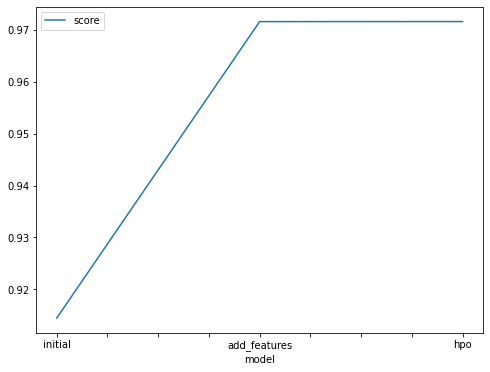

In [175]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [0.914456, 0.971613, 0.971624]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

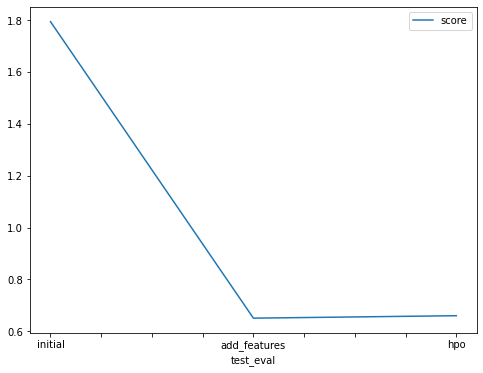

In [176]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79416, 0.65076, 0.66024]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [?, ?, ?],
    "hpo2": [?, ?, ?],
    "hpo3": [?, ?, ?],
    "score": [?, ?, ?]
})